In [1]:
%matplotlib inline

import json
import glob
import re
import itertools
import functools

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
mpl.rc('font', family='Arial', size=12)

In [2]:
quartet_counts = pd.read_csv('genome_correlations/quartet_counts.bed', sep='\t', names=('chr', 'start', 'end', 'ucsc_name', 'region_type', 'strand', 'n_quartets'))

In [3]:
quartet_counts.head()

,chr,start,end,ucsc_name,region_type,strand,n_quartets
0,chr1,13749354,13749854,chr1:13704854-13825079;+,ns,+,3
1,chr1,13749854,13750354,chr1:13704854-13825079;+,ns,+,0
2,chr1,13750354,13750854,chr1:13704854-13825079;+,ns,+,0
3,chr1,13750854,13751354,chr1:13704854-13825079;+,ns,+,0
4,chr1,13751354,13751854,chr1:13704854-13825079;+,ns,+,0


In [4]:
quartet_counts.n_quartets.value_counts()

0    19422
1      507
2       32
3        9
4        2
5        1
Name: n_quartets, dtype: int64

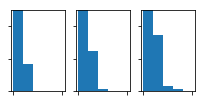

In [5]:
fig, ax = plt.subplots(ncols=3, sharey=True, figsize=(3.3, 1.5))

for a, region_type in zip(ax, ['faster', 'ns', 'slower']):
    counts = quartet_counts.loc[quartet_counts.region_type == region_type, 'n_quartets']
    a.hist(counts, bins = np.arange(0, 6, 1), normed=True)
    a.set_ylim(0, 0.05)
    a.set_xticklabels(['']*len(a.get_xticklabels()))
ax[0].set_ylabel('')
ax[0].set_yticklabels(['']*len(ax[0].get_yticklabels()))
fig.savefig('N_quartets.svg')

[Text(0,0,''), Text(0,0,''), Text(0,0,''), Text(0,0,'')]

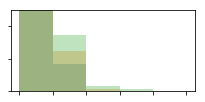

In [6]:
fig, ax = plt.subplots( sharey=True, figsize=(3.3, 1.5))

for region_type in ['faster', 'ns', 'slower']:
    counts = quartet_counts.loc[quartet_counts.region_type == region_type, 'n_quartets']
    ax.hist(counts, bins = np.arange(0, 6, 1), normed=True, alpha=0.3)
    ax.set_ylim(0, 0.05)
    ax.set_xticklabels(['']*len(ax.get_xticklabels()))
ax.set_ylabel('')
ax.set_yticklabels(['']*len(ax.get_yticklabels()))
#fig.savefig('N_quartets.svg')

In [7]:
count_data = (quartet_counts
              .groupby(['region_type', 'n_quartets'])
              .size()
              .unstack()
              .fillna(0)
              )

In [8]:
count_data.head()

n_quartets,0,1,2,3,4,5
region_type,,,,,,
faster,1614.0,27.0,0.0,0.0,0.0,0.0
ns,14924.0,377.0,23.0,4.0,1.0,1.0
slower,2884.0,103.0,9.0,5.0,1.0,0.0


In [9]:
count_data = pd.melt(count_data.div(count_data.sum(axis=1), axis=0).reset_index(), id_vars='region_type')

In [ ]:
sns.

/Users/cimprich/anaconda/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


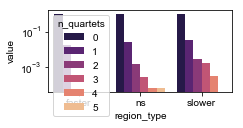

In [35]:
fig, ax = plt.subplots( sharey=True, figsize=(3.3, 1.5))
sns.barplot(data=count_data, x = 'region_type', y='value', hue='n_quartets', ax=ax, palette='magma')
#ax.set_ylim(0, 0.05)
ax.set_yscale('log')
fig.savefig('quartet_barplot_annotated.svg')

/Users/cimprich/anaconda/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


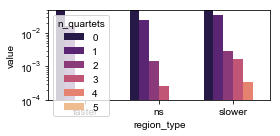

In [54]:
fig, ax = plt.subplots( sharey=True, figsize=(4, 2))
sns.barplot(data=count_data, x = 'region_type', y='value', hue='n_quartets', ax=ax, palette='magma')
#ax.set_ylim(0, 0.05)
ax.set_yscale('log')
ax.set_ylim(1e-4, 5e-2)
fig.tight_layout()
fig.savefig('quartet_barplot_annotated.svg')
fig.savefig('quartet_barplot_annotated.pdf',transparent=True)

/Users/cimprich/anaconda/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


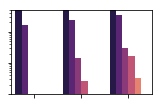

In [11]:
fig, ax = plt.subplots( sharey=True, figsize=(2.36, 1.57))
sns.barplot(data=count_data, x = 'region_type', y='value', hue='n_quartets', ax=ax, palette='magma')
#ax.set_ylim(0, 0.05)
ax.set_ylim(1e-4, 5e-2)
ax.set_yscale('log')
ax.set_xticklabels(['']*len(ax.get_xticklabels()))
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yticklabels(['']*len(ax.get_yticklabels()))
ax.get_legend().remove()
fig.tight_layout()
fig.savefig('quartet_barplot_unannotated.svg')
fig.savefig('quartet_barplot_unannotated.pdf',transparent=True)

In [ ]:
a.get_xticklabels

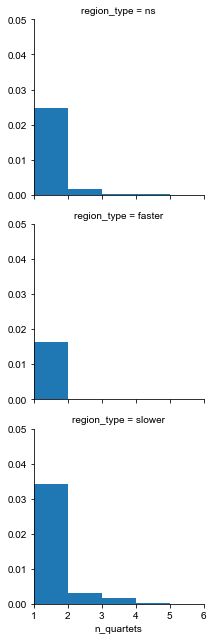

In [24]:
g= sns.FacetGrid(
 row = 'region_type',
 data = quartet_counts,
)

g.map(plt.hist, 'n_quartets', normed=True, bins = np.arange(0,6,1))
g.set(xlim = (1,6), ylim = (0, 0.05))

In [19]:
stats.kruskal(quartet_counts.loc[quartet_counts.region_type == 'slower', 'n_quartets'], 
              quartet_counts.loc[quartet_counts.region_type == 'ns', 'n_quartets'], 
              quartet_counts.loc[quartet_counts.region_type == 'faster', 'n_quartets'])

KruskalResult(statistic=23.84249910665137, pvalue=6.6476340182982895e-06)